### Import libraries and file

In [1]:
import pandas as pd
import csv
import numpy as np
import warnings
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import complete, fcluster
from scipy.cluster.hierarchy import linkage
import seaborn as sns
from kmedoids import kmedoids

### Load npy file

In [2]:
matrix = np.load('/mnt/files/matrix.npy')

### Result Shapes

In [3]:
matrix.shape

(95458, 1226)

### Slicing consider similar objects

In [4]:
row_idx = np.array([382,539,668,1064,1174,1397,1398,1400,1401,1402,1403,1404,1405,1406,1409,1814,1928,2094,2164,2368,2470,2511,2734,2735,2770,2771,2773,2799,2859,3063,3099,3100,3101,3102,3103,3109,3250,3252,3256,3265,3266,3324,3659,3673,3714,3819,3826,4018,4097,4171,4186,4231,4408,4465,4585,4660,4896,5510,5511,5623,5635,6081,6090,6117,6124,6194,6302,6329,6428,6544,6570,6574,6687,6688,6999,7073,7091,7095,7225,7230,7354,7364,7378,7399,7493,7516,7552,7600,7625,7657,7716,7851,7942,7971,7988,8049,8062,8186,8216,8342,8498,8684,8821,8967,8969,9041,9275,9828,10032,10086,10087,10343,10555,11476,11481,11482,11483,11484,11485,11486,11487,11488,11489,11629,11908,11930,11932,11950,11954,11958,11960,11962,11964,11972,11974,11976,11978,12020,12042,12043,12044,13142,13335,13469,13599,13601,14014,14015,14382,14456,14756,14757,14759,14841,14917,15054,15841,15866,16154,16216,16217,16257,16401,16402,16404,16424,16534,16662,16695,16940,17112,17200,17395,17437,17553,17889,17991,18014,18186,18273,18274,18275,18276,18419,18586,18650,19064,20377,20378,20387,20592,20593,20594,20648,20847,22441,22493,22547,22927,22967,23460,23505,23603,23605,23721,23723,23823,24175,24196,24339,24377,24608,24611,24613,25034,25035,25432,25535,25599,25837,25838,26100,26364,26496,26546,26673,26911,26912,27389,27390,27445,27537,27722,27937,28280,28283,28366,28403,28440,28452,28453,28455,28456,28457,28458,28459,28460,28461,28462,28464,28465,28466,28467,28468,28469,28470,28471,28472,28473,28475,28476,28477,28478,28479,28481,28482,28483,28484,28485,28486,28487,28488,28489,28490,28491,28492,28493,28494,28495,28496,28497,28498,28499,28500,28501,28502,28503,28504,28505,28506,28507,28508,28509,28510,28511,28512,28513,28514,28515,28516,28517,28518,28519,28520,28521,28522,28523,28524,28525,28526,28527,28528,28529,28530,28531,28532,28533,28534,28535,28536,28537,28538,28539,28540,28541,28542,28543,28544,28545,28546,28547,28608,28609,29030,29148,29291,29914,29966,29991,30111,30113,30220,30406,30530,30664,30870,30873,30874,30878,30879,31587,31953,31955,31956,31957,32312,32464,32467,32922,33284,33361,33705,33845,33949,33950,34011,34032,34047,34117,34182,34393,34585,34609,34835,34837,34838,34935,35389,35734,35944,35947,36063,36273,36506,36651,36692,36714,36715,36716,36832,36833,36954,37164,37300,37309,37403,37462,37611,37659,38812,39236,39537,39756,39846,40050,40232,40269,40271,40272,40273,40274,40275,40354,40369,40374,40375,40378,40399,40585,40837,40850,40893,40894,41069,41070,41075,41076,41093,41135,41333,41402,41417,41419,41491,41552,41603,41674,41783,41883,42116,42133,42675,42756,42910,42947,43569,43665,43786,43944,44087,44452,44858,45288,45379,45568,45697,45816,45817,45837,45838,45969,45983,46293,46572,46645,46789,46858,46875,47102,47380,47524,47816,48089,48194,48298,48536,48895,49381,49611,49612,49613,49614,49684,49895,50103,50120,50349,50363,50610,50614,50615,50909,51117,51129,51422,51769,51851,51853,51867,52150,52163,52213,52218,52516,52640,52773,52776,53375,53646,53649,53926,54384,54628,54659,54694,54695,54749,54751,54759,54760,54940,55186,55190,55600,55603,55604,55737,55738,55938,55990,55991,56163,56164,56233,56234,56238,56266,56268,56423,56440,56441,56442,56548,56624,56625,56723,56892,56893,56894,56937,57677,57717,57783,57866,57976,57977,58024,58028,58033,58035,58190,58191,58361,58362,58363,58420,58609,59122,59124,59613,59807,59830,59832,59833,60038,60047,60255,60256,60257,60258,60259,60260,60261,60262,60271,60320,60323,60480,60558,60589,60883,60885,60886,60887,60888,60889,60912,60913,61133,61155,61746,61780,61879,62284,62450,62456,62464,62537,62645,62712,62754,62838,62938,63443,63454,63455,63703,63704,63794,64239,64240,64241,64242,64244,64286,65053,65297,65298,65536,65647,65828,66067,66102,66275,66276,66277,66284,66382,66480,66708,66959,66960,67153,67154,67155,67157,67158,67161,67162,67163,67164,67172,67173,67181,67184,67185,67186,67187,67188,67189,67190,67192,67195,67197,67198,67199,67201,67203,67204,67208,67209,67210,67213,67214,67216,67219,67224,67226,67230,67232,67236,67237,67242,67243,67244,67245,67246,67250,67251,67252,67254,67255,67256,67259,67260,67261,67263,67264,67265,67267,67268,67269,67272,67275,67281,67286,67287,67288,67291,67293,67297,67299,67300,67301,67303,67307,67308,67309,67310,67311,67312,67314,67316,67317,67321,67325,67329,67330,67331,67334,67335,67337,67340,67345,67346,67347,67350,67352,67354,67356,67357,67370,67371,67373,67374,67376,67378,67379,67383,67386,67389,67392,67395,67398,67399,67403,67405,67407,67408,67411,67412,67413,67414,67415,67417,67419,67421,67423,67424,67425,67428,67429,67430,67431,67432,67433,67434,67435,67437,67440,67442,67454,67455,67456,67457,67458,67459,67463,67465,67474,67477,67480,67481,67483,67487,67490,67492,67495,67498,67501,67502,67503,67504,67507,67509,67511,67512,67514,67517,67518,67520,67521,67522,67523,67525,67529,67530,67538,67541,67542,67544,67545,67546,67547,67550,67552,67555,67560,67561,67565,67569,67571,67572,67573,67574,67583,67585,67590,67592,67596,67599,67604,67607,67609,67612,67614,67617,67618,67620,67621,67623,67625,67628,67629,67630,67632,67641,67646,67649,67651,67654,67655,67657,67658,67659,67663,67664,67666,67667,67668,67670,67677,67833,67884,67917,67918,67920,67923,67925,67927,67928,67929,67930,67935,67937,67943,67945,67946,67961,67969,67970,68279,68281,68343,68351,68377,68386,68387,68390,68395,68498,68499,68501,68660,68764,68809,68810,68819,68821,69055,69063,69067,69075,69077,69079,69128,69129,69130,69132,69133,69134,69135,69138,69150,69152,69285,69287,69289,69291,69292,69293,69295,69751,69878,69940,69941,70503,70532,70533,70534,70683,71110,71163,71166,71281,71374,71504,71517,71569,71570,71680,71726,72117,72506,72623,72635,72738,72768,72843,72844,72845,72846,72847,72941,72942,73168,73729,73781,73803,73973,73974,74040,74089,74396,74465,74477,74576,74650,74652,75317,75522,75619,75894,75895,76119,76671,76672,76677,76680,76681,76861,76862,76949,76950,76951,76952,76975,76977,76978,76979,77267,77443,77461,77492,77588,77632,77633,77921,77958,78002,78111,78115,78312,78693,78766,79054,79132,79144,79151,79318,79929,79991,80227,80229,80462,81167,81169,81275,81277,81283,81320,81380,81502,81594,81624,81852,82238,82239,82517,82796,82799,82800,82802,83202,83312,83411,83501,83502,83576,83685,83697,84325,84463,84495,84509,84555,84595,85565,85605,85606,85627,85628,85633,85634,85635,85637,85639,85641,85730,86095,86176,86284,86373,86390,86476,86493,86670,86674,86919,87027,87069,87185,87222,87786,87815,87826,88512,88572,88747,88751,88752,88883,88931,88932,88933,88934,88935,88954,88955,89175,89295,89347,89585,89618,89761,89785,89788,89829,89868,89869,90215,90594,90595,90678,90933,90981,91043,91269,91270,91271,91398,91758,91771,91772,91773,91869,92018,92035,92083,92305,92441,92631,92669,93023,93224,93424,93448,93502,93625,93744,93861,93897,94414,94514,94515,94937,94993,95078,95299,95302,95417])

In [5]:
matrix_sliced = matrix[row_idx, :]

In [6]:
matrix_sliced.shape

(1151, 1226)

In [7]:
upper_sm_sliced = pdist(matrix_sliced, 'cosine')

In [8]:
upper_sm_sliced.shape

(661825,)

In [9]:
sm_sliced = np.float32(squareform(upper_sm_sliced))

### Trick to allow make huge numbers of recursion ( if needed)

In [10]:
import sys
sys.setrecursionlimit(100000)

### Hierarchy Cluster using sliced values

In [11]:
hc_sliced = linkage(upper_sm_sliced, method='complete')

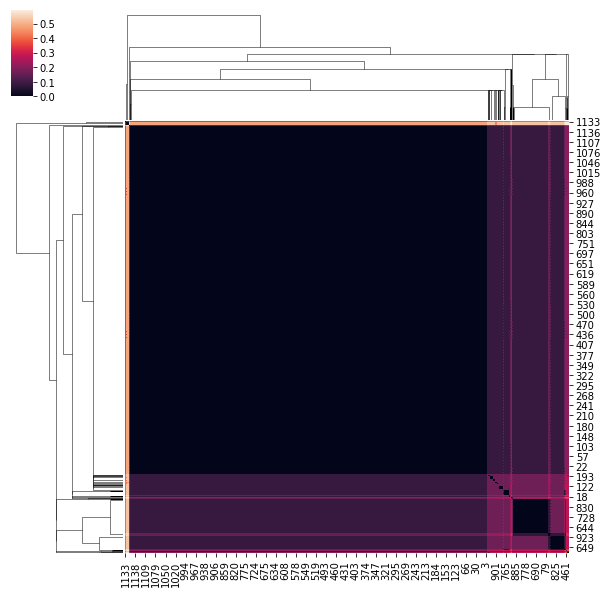

In [12]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced)

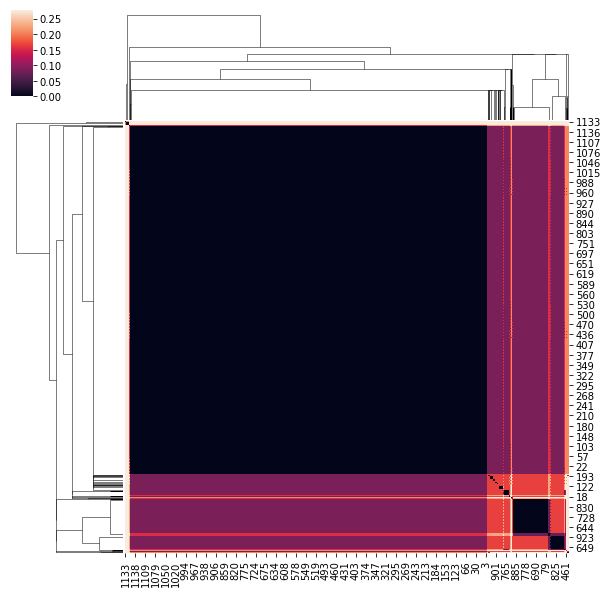

In [13]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True)

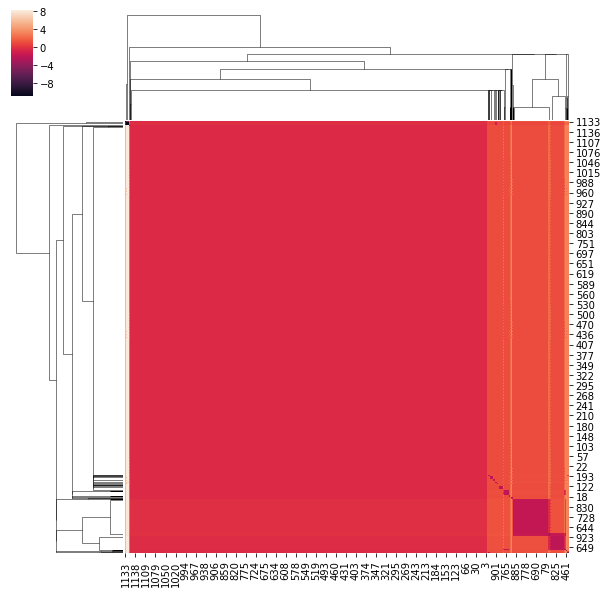

In [14]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, z_score=0)

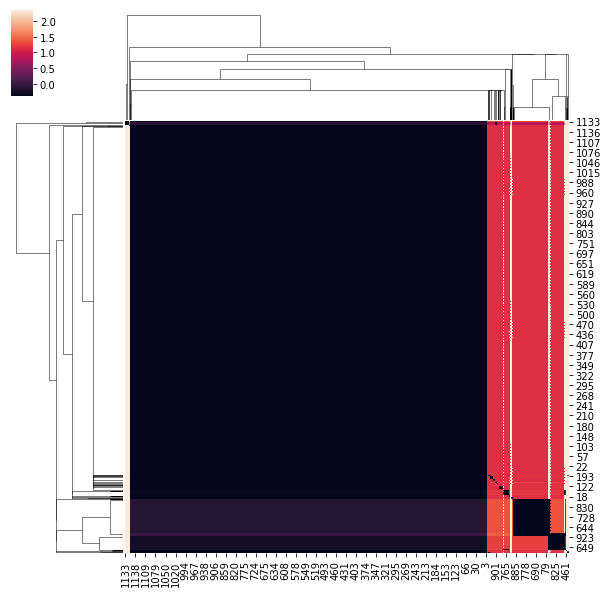

In [15]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True, z_score=0)